In [85]:
import pandas as pd

file_path ='/home/delhivery/Desktop/skyhack/callsf0d4f5a.csv'
data = pd.read_csv(file_path)


print(data.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  


In [5]:
print(data["call_transcript"][0])



Agent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?

Customer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. 

Agent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.

Customer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. 

Agent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help make this 

In [58]:
print(data["call_id"].count())

71810


In [9]:
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'], format='%m/%d/%Y %H:%M')
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')

data['waiting_time'] = data['agent_assigned_datetime'] - data['call_start_datetime']


# print(data[['call_start_datetime', 'agent_assigned_datetime', 'waiting_time']].head())


data['waiting_time_minutes'] = data['waiting_time'].dt.total_seconds() / 60


print(data[['call_start_datetime', 'agent_assigned_datetime', 'waiting_time', 'waiting_time_minutes']].head())




  call_start_datetime agent_assigned_datetime    waiting_time  \
0 2024-07-31 23:56:00     2024-08-01 00:03:00 0 days 00:07:00   
1 2024-08-01 00:03:00     2024-08-01 00:06:00 0 days 00:03:00   
2 2024-07-31 23:59:00     2024-08-01 00:07:00 0 days 00:08:00   
3 2024-08-01 00:05:00     2024-08-01 00:10:00 0 days 00:05:00   
4 2024-08-01 00:04:00     2024-08-01 00:14:00 0 days 00:10:00   

   waiting_time_minutes  
0                   7.0  
1                   3.0  
2                   8.0  
3                   5.0  
4                  10.0  


In [10]:
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'], format='%m/%d/%Y %H:%M')
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')

data['call_time'] = data['call_end_datetime'] -data['agent_assigned_datetime'] 


# print(data[['call_start_datetime', 'agent_assigned_datetime', 'waiting_time']].head())


data['call_time_minutes'] = data['call_time'].dt.total_seconds() / 60


print(data[[ 'agent_assigned_datetime','call_end_datetime', 'call_time', 'call_time_minutes']].head(1))





  agent_assigned_datetime   call_end_datetime       call_time  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00 0 days 00:31:00   

   call_time_minutes  
0               31.0  


In [12]:
AHT = data['call_time_minutes'].mean()
AST = data['waiting_time_minutes'].mean()
print("call_time_minutes",AHT)
print("waitting_time_minutes",AST)

call_time_minutes 11.61747667455786
waitting_time_minutes 7.284458988998747


In [13]:
# Calculate handle time in seconds
data['handle_time'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()

# Calculate waiting time in seconds
data['waiting_time'] = (data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()

In [14]:
# Extract date from datetime
data['date'] = data['call_start_datetime'].dt.date

# Group by the extracted date
daily_metrics = data.groupby('date').agg({
    'handle_time': 'mean',  # Average Handle Time per day
    'waiting_time': 'mean'  # Average Speed to Answer per day
}).reset_index()


In [22]:
# Sort by handle time in descending order to get the days with the highest AHT
top_aht_days = daily_metrics.sort_values(by='handle_time', ascending=False).head(10)

# Sort by waiting time in descending order to get the days with the highest AST
top_ast_days = daily_metrics.sort_values(by='waiting_time', ascending=False).head(10)


In [23]:
print("Top 5 Days with the Highest Average Handle Time (AHT):")
print(top_aht_days)

print("\nTop 5 Days with the Highest Average Speed to Answer (AST):")
print(top_ast_days)


Top 5 Days with the Highest Average Handle Time (AHT):
          date  handle_time  waiting_time
0   2024-07-31  1500.000000    450.000000
30  2024-08-30   724.891304    440.636646
29  2024-08-29   722.647719    441.675393
14  2024-08-14   716.090909    441.954545
20  2024-08-20   715.673981    443.087774
9   2024-08-09   712.678571    437.321429
31  2024-08-31   710.638478    436.414376
21  2024-08-21   707.990833    441.405653
4   2024-08-04   707.757146    442.257459
10  2024-08-10   706.325524    436.387176

Top 5 Days with the Highest Average Speed to Answer (AST):
          date  handle_time  waiting_time
0   2024-07-31  1500.000000    450.000000
6   2024-08-06   682.682388    444.627856
20  2024-08-20   715.673981    443.087774
4   2024-08-04   707.757146    442.257459
14  2024-08-14   716.090909    441.954545
29  2024-08-29   722.647719    441.675393
21  2024-08-21   707.990833    441.405653
30  2024-08-30   724.891304    440.636646
7   2024-08-07   702.775120    440.574163
1  

In [24]:
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'])

# Extract date from datetime for grouping
data['date'] = data['call_start_datetime'].dt.date

In [32]:
calls_per_day = data.groupby('date').size().reset_index(name='call_count')

# Display the result
print(calls_per_day.count())

date          32
call_count    32
dtype: int64


In [33]:
# Sort by 'call_count' in descending order and take the top 10
top_10_days = calls_per_day.sort_values(by='call_count', ascending=False).head(10)

# Display the top 10 days with the highest call counts
print(top_10_days)


          date  call_count
10  2024-08-10        4866
3   2024-08-03        4831
17  2024-08-17        4814
18  2024-08-18        4804
4   2024-08-04        4793
25  2024-08-25        4774
11  2024-08-11        4731
31  2024-08-31        4730
24  2024-08-24        4711
6   2024-08-06        1357


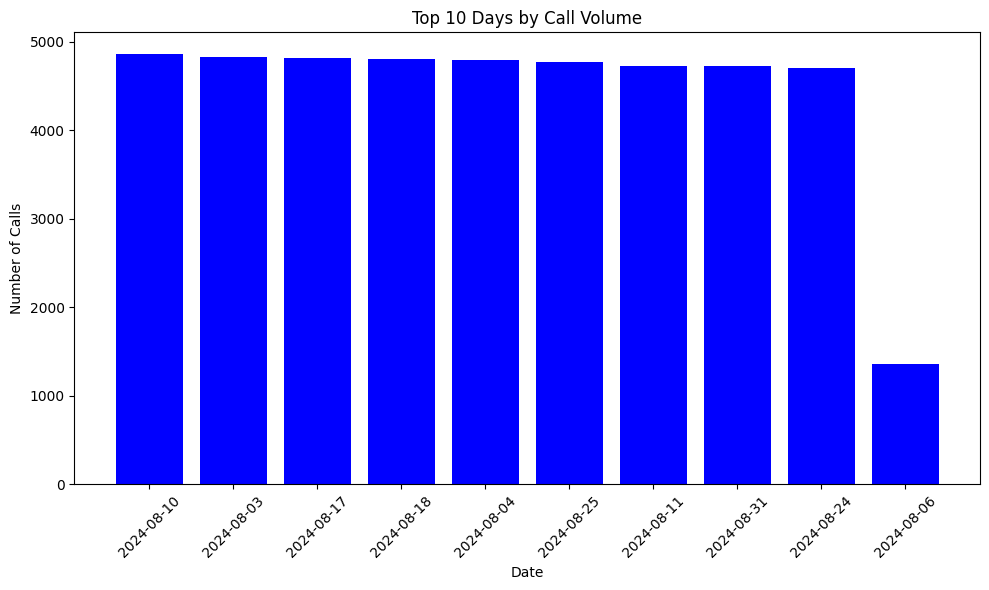

In [37]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_10_days['date'].astype(str), top_10_days['call_count'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Top 10 Days by Call Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'])
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'])
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'])

# Calculate handle time and waiting time in seconds
data['handle_time'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()
data['waiting_time'] = (data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()

# Extract the date for grouping
data['date'] = data['call_start_datetime'].dt.date

In [35]:
daily_metrics = data.groupby('date').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean'
}).reset_index()


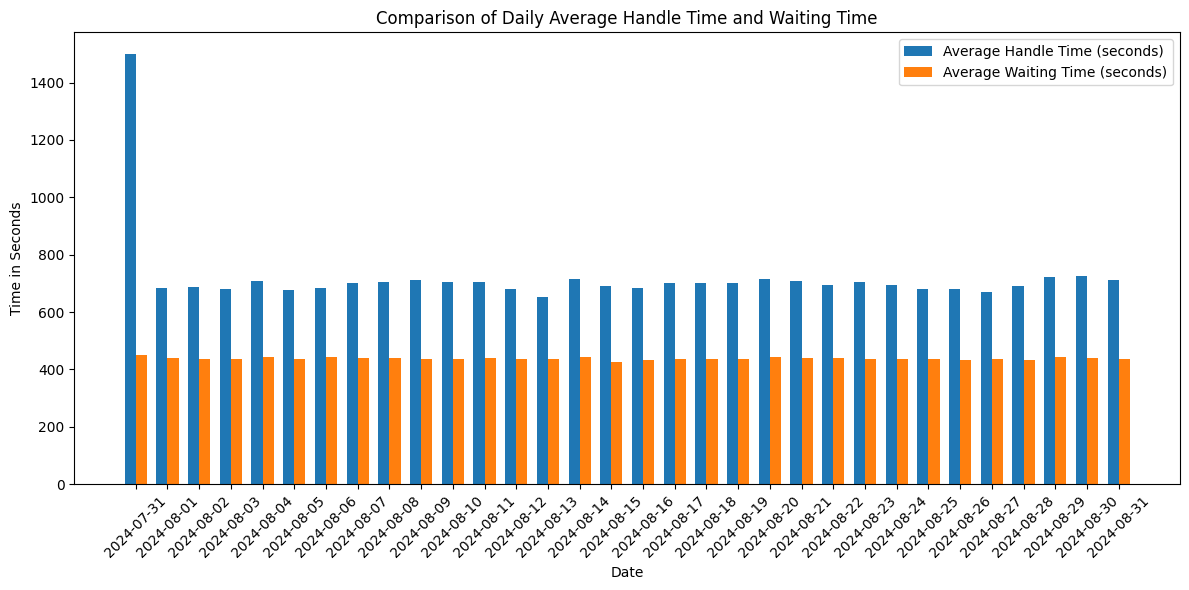

In [38]:
import matplotlib.pyplot as plt

# Set the figure size and title
plt.figure(figsize=(12, 6))
plt.title('Comparison of Daily Average Handle Time and Waiting Time')

# Plotting data
bar_width = 0.35  # width of bars
index = range(len(daily_metrics['date']))  # create a list of index numbers equal to the number of dates

# Plot each metric
plt.bar(index, daily_metrics['handle_time'], width=bar_width, label='Average Handle Time (seconds)')
plt.bar([p + bar_width for p in index], daily_metrics['waiting_time'], width=bar_width, label='Average Waiting Time (seconds)')

# Labeling
plt.xlabel('Date')
plt.ylabel('Time in Seconds')
plt.xticks([p + bar_width / 2 for p in index], daily_metrics['date'].astype(str), rotation=45)  # set x-ticks to be the middle of the grouped bars

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()


In [39]:
daily_metrics = data.groupby('date').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean',
    'call_id': 'count'  # Assuming 'call_id' is a unique identifier for calls
}).rename(columns={'call_id': 'call_count'}).reset_index()


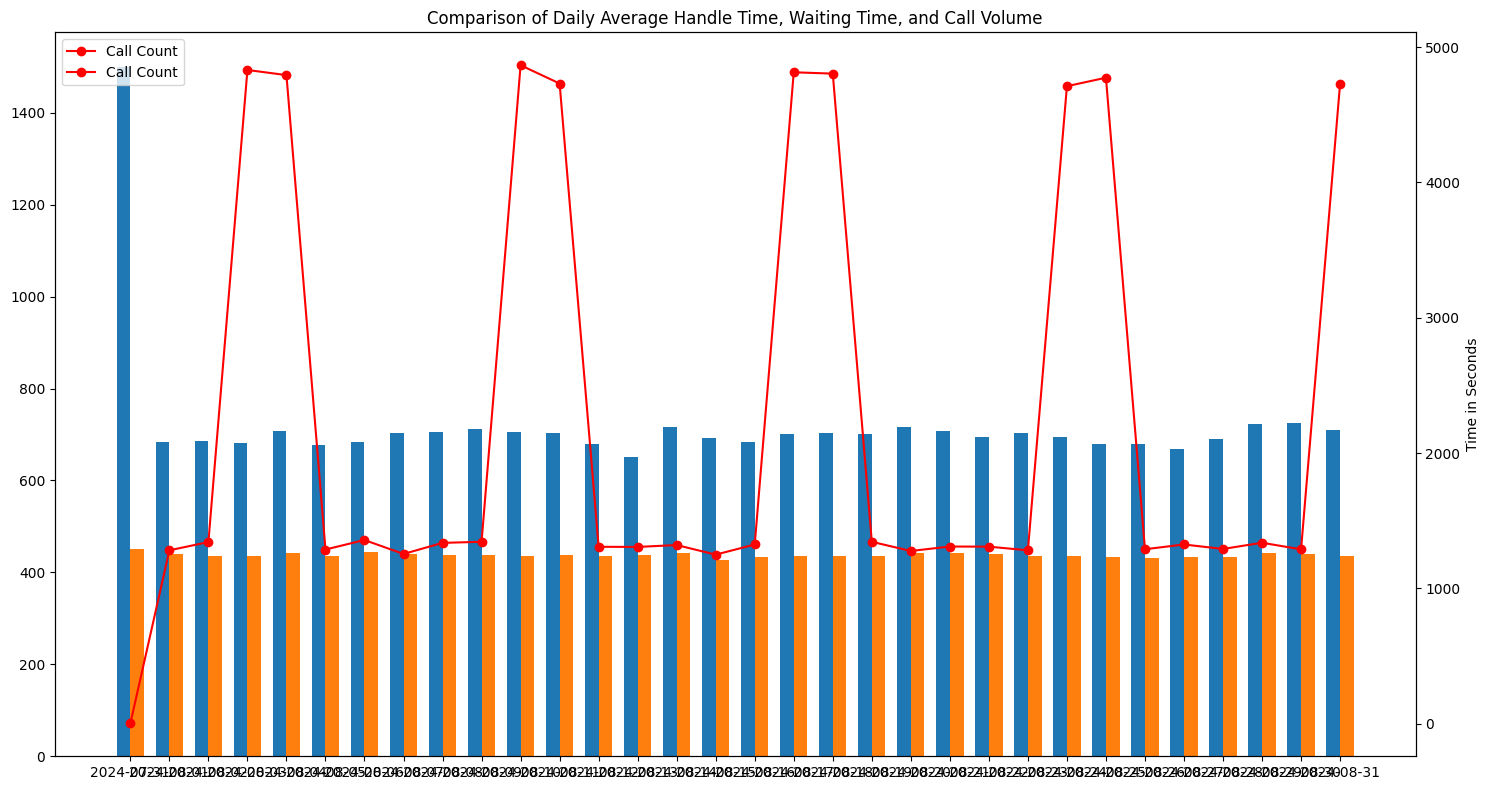

In [40]:
import matplotlib.pyplot as plt

# Set the figure size and title
plt.figure(figsize=(15, 8))
plt.title('Comparison of Daily Average Handle Time, Waiting Time, and Call Volume')

# Set up the primary bar chart (handle time and waiting time)
bar_width = 0.35  # width of bars
index = range(len(daily_metrics['date']))  # create a list of index numbers equal to the number of dates

# Plot handle time and waiting time
plt.bar(index, daily_metrics['handle_time'], width=bar_width, label='Average Handle Time (seconds)')
plt.bar([p + bar_width for p in index], daily_metrics['waiting_time'], width=bar_width, label='Average Waiting Time (seconds)')

# Create secondary y-axis for the call count
ax2 = plt.gca().twinx()
ax2.plot([p + bar_width/2 for p in index], daily_metrics['call_count'], color='red', label='Call Count', marker='o')
ax2.set_ylabel('Call Count')

# Labeling the x-axis
plt.xticks([p + bar_width / 2 for p in index], daily_metrics['date'].astype(str), rotation=45)

# X and Y labels for primary y-axis
plt.xlabel('Date')
plt.ylabel('Time in Seconds')

# Add legend for all data series
handles, labels = plt.gca().get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles + handles2, labels + labels2, loc='best')

# Show the plot
plt.tight_layout()
plt.show()


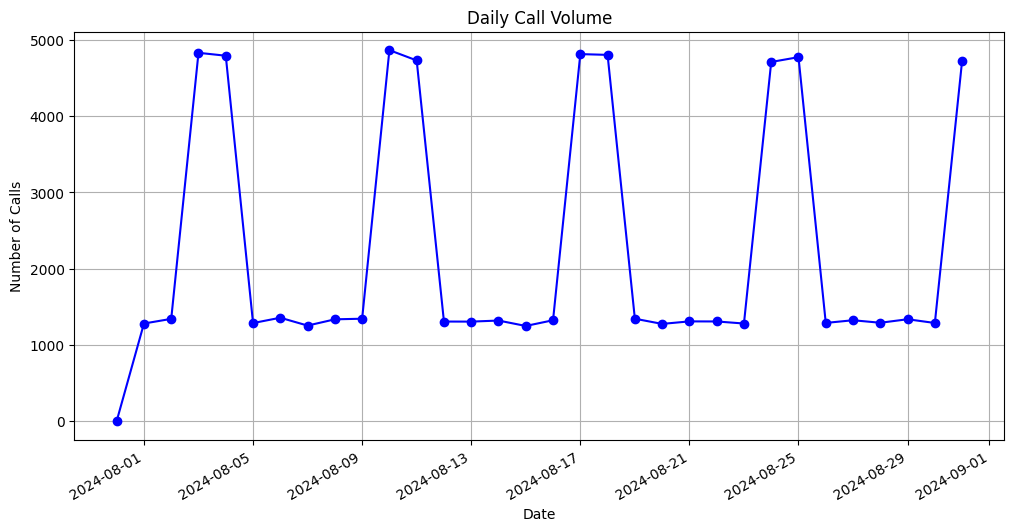

In [41]:
import matplotlib.pyplot as plt

# Set the figure size and plot title
plt.figure(figsize=(12, 6))
plt.title('Daily Call Volume')

# Plotting the line chart
plt.plot(calls_per_day['date'], calls_per_day['call_count'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Calls')

# Optionally, you can format the x-axis to show dates more clearly
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit better

plt.grid(True)  # Add gridlines for better readability

# Show the plot
plt.show()


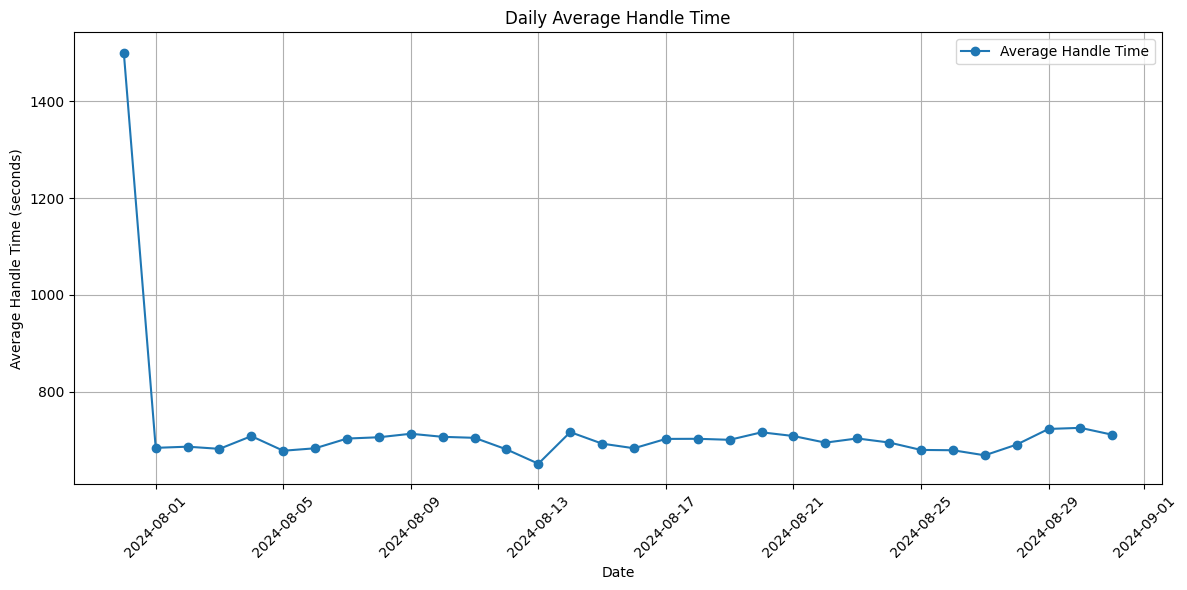

In [52]:
import matplotlib.pyplot as plt
# Group by date and calculate the average handle time
daily_aht = data.groupby('date').agg({'handle_time': 'mean'}).reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot line chart of average handle time vs. day
plt.plot(daily_aht['date'], daily_aht['handle_time'], label='Average Handle Time', marker='o', linestyle='-')

# Labeling the axes and title
plt.xlabel('Date')
plt.ylabel('Average Handle Time (seconds)')
plt.title('Daily Average Handle Time')

# Optional: Rotate date labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits into the figure area
plt.show()


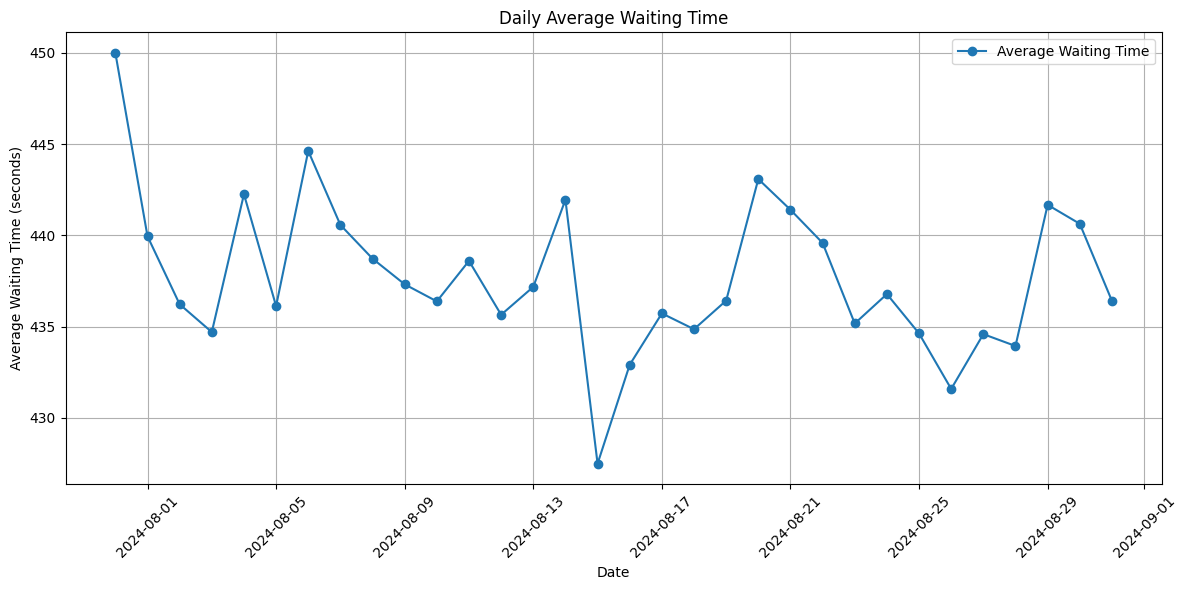

In [53]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))
# Group by date and calculate the average waiting time
daily_waiting_time = data.groupby('date').agg({'waiting_time': 'mean'}).reset_index()

# Plot line chart of average waiting time vs. day
plt.plot(daily_waiting_time['date'], daily_waiting_time['waiting_time'], label='Average Waiting Time', marker='o', linestyle='-')

# Labeling the axes and title
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Daily Average Waiting Time')

# Optional: Rotate date labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits into the figure area
plt.show()


In [42]:
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'])

# Extract the date and the day of the week
data['date'] = data['call_start_datetime'].dt.date
data['day_of_week'] = data['call_start_datetime'].dt.day_name()

In [43]:
# Count calls per date
calls_per_date = data.groupby(['date', 'day_of_week']).size().reset_index(name='call_count')


In [44]:
# Calculate mean call count per weekday
mean_calls_per_weekday = calls_per_date.groupby('day_of_week')['call_count'].mean().reset_index()

# Optionally, order the days from Monday to Sunday
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
mean_calls_per_weekday['day_of_week'] = pd.Categorical(mean_calls_per_weekday['day_of_week'], categories=weekdays, ordered=True)
mean_calls_per_weekday = mean_calls_per_weekday.sort_values('day_of_week')


  day_of_week  call_count
1      Monday     1306.75
5     Tuesday     1315.75
6   Wednesday     1035.20
4    Thursday     1302.20
0      Friday     1315.80
2    Saturday     4790.40
3      Sunday     4775.50


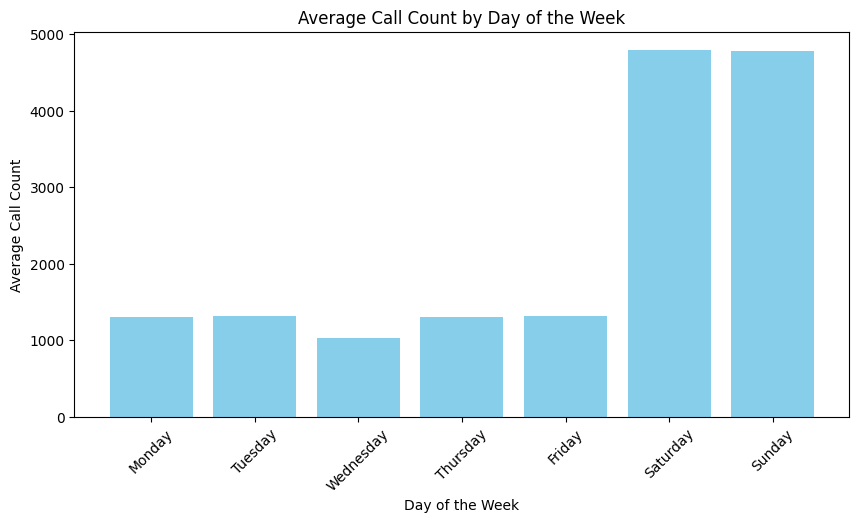

In [45]:
# Print the results
print(mean_calls_per_weekday)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(mean_calls_per_weekday['day_of_week'], mean_calls_per_weekday['call_count'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Call Count')
plt.title('Average Call Count by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Filter for Saturdays and Sundays
weekend_data = data[data['day_of_week'].isin(['Saturday', 'Sunday'])]


In [50]:
# Calculate mean handle time and waiting time for Saturdays and Sundays
weekend_averages = weekend_data.groupby('day_of_week').agg({
    'handle_time': 'mean',
    'waiting_time': 'mean'
}).reset_index()

# Optional: Specify the day order
weekend_averages['day_of_week'] = pd.Categorical(weekend_averages['day_of_week'], categories=["Saturday", "Sunday"], ordered=True)
weekend_averages = weekend_averages.sort_values('day_of_week')


  day_of_week  handle_time  waiting_time
0    Saturday   698.992986    435.999499
1      Sunday   698.386556    437.586640


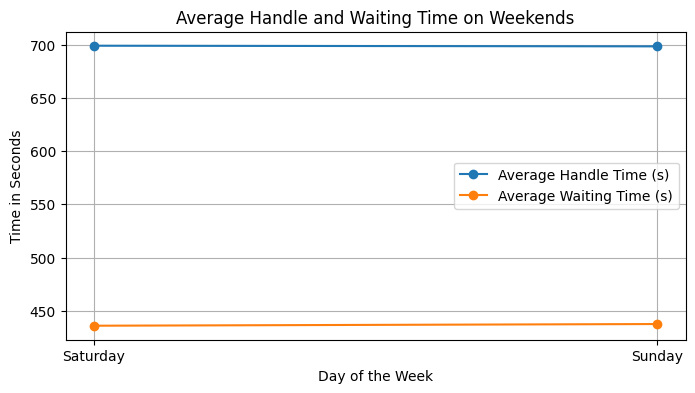

In [48]:
# Print the results
print(weekend_averages)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(weekend_averages['day_of_week'], weekend_averages['handle_time'], label='Average Handle Time (s)', marker='o')
plt.plot(weekend_averages['day_of_week'], weekend_averages['waiting_time'], label='Average Waiting Time (s)', marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Time in Seconds')
plt.title('Average Handle and Waiting Time on Weekends')
plt.legend()
plt.grid(True)
plt.show()


In [55]:


# Convert to datetime if necessary
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'])
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'])
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'])

# Calculate handle time and waiting time in seconds
data['handle_time'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()
data['waiting_time'] = (data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()

# Extract the date for grouping
data['date'] = data['call_start_datetime'].dt.date


In [56]:
# Group by date and calculate AHT and AST
daily_metrics = data.groupby('date').agg({
    'handle_time': 'sum',  # Total handle time per day
    'waiting_time': 'sum',  # Total waiting time per day
    'call_id': 'count'  # Total number of calls per day
}).rename(columns={'call_id': 'total_calls'}).reset_index()

daily_metrics['AHT'] = daily_metrics['handle_time'] / daily_metrics['total_calls']
daily_metrics['AST'] = daily_metrics['waiting_time'] / daily_metrics['total_calls']


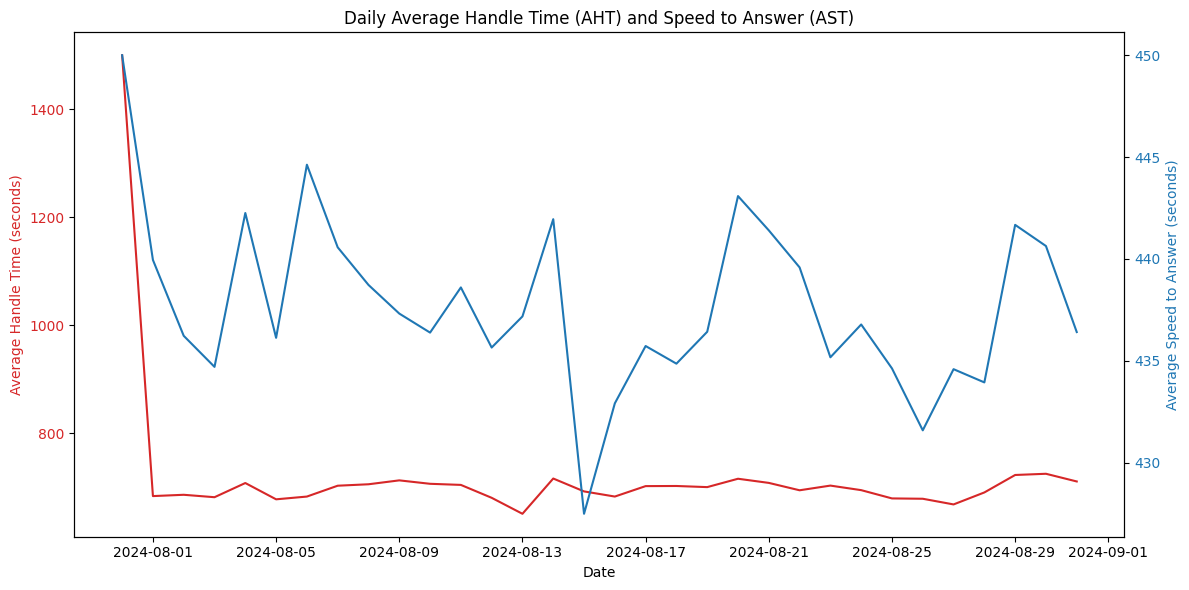

In [57]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting AHT on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Handle Time (seconds)', color=color)
ax1.plot(daily_metrics['date'], daily_metrics['AHT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for AST
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Speed to Answer (seconds)', color=color)
ax2.plot(daily_metrics['date'], daily_metrics['AST'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Daily Average Handle Time (AHT) and Speed to Answer (AST)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


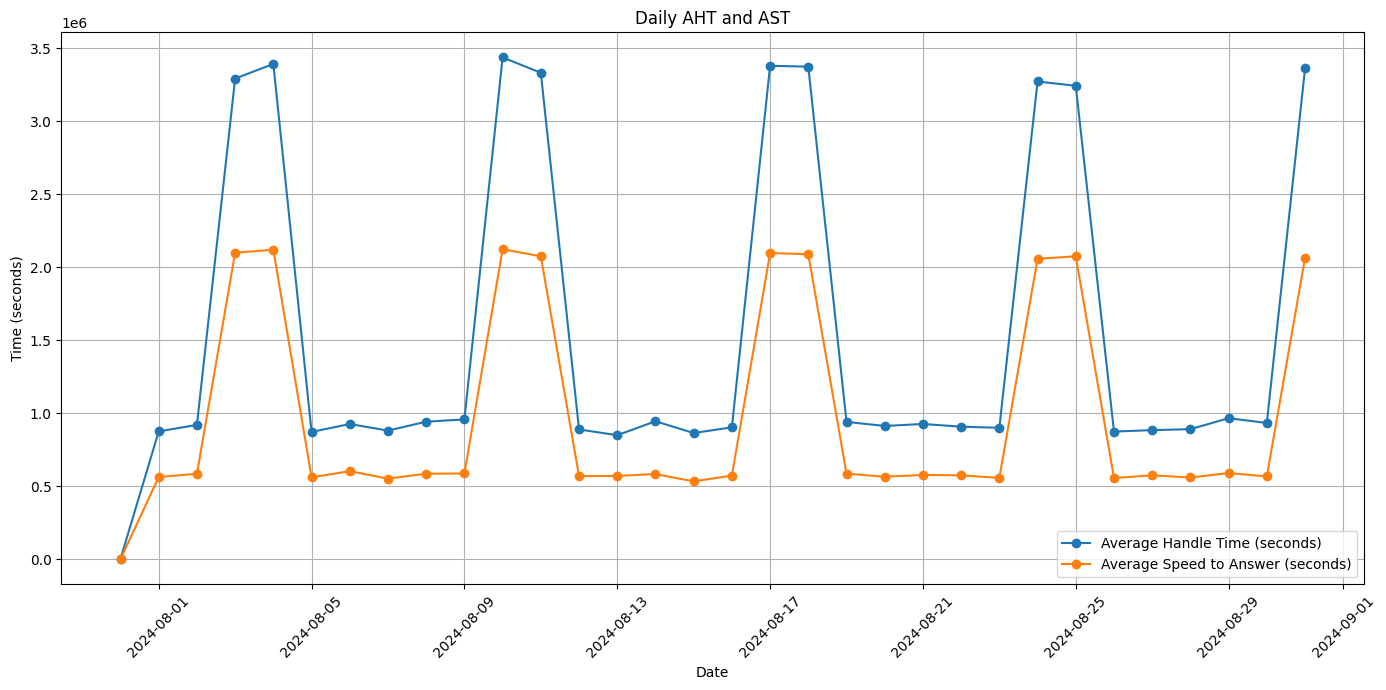

Top 9 Dates with the Highest AST (Average Speed to Answer):
          date  waiting_time
10  2024-08-10     2123460.0
4   2024-08-04     2119740.0
3   2024-08-03     2100060.0
17  2024-08-17     2097600.0
18  2024-08-18     2089080.0
11  2024-08-11     2075040.0
25  2024-08-25     2074920.0
31  2024-08-31     2064240.0
24  2024-08-24     2057700.0
6   2024-08-06      603360.0

Top 10 Dates with the Highest AHT (Average Handle Time):
          date  handle_time
10  2024-08-10    3436980.0
4   2024-08-04    3392280.0
17  2024-08-17    3379620.0
18  2024-08-18    3373680.0
31  2024-08-31    3361320.0
11  2024-08-11    3331920.0
3   2024-08-03    3292260.0
24  2024-08-24    3272100.0
25  2024-08-25    3242700.0
29  2024-08-29     966180.0


In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_metrics['date'], daily_metrics['handle_time'], label='Average Handle Time (seconds)', marker='o')
plt.plot(daily_metrics['date'], daily_metrics['waiting_time'], label='Average Speed to Answer (seconds)', marker='o')
plt.xlabel('Date')
plt.ylabel('Time (seconds)')
plt.title('Daily AHT and AST')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Sort by AST and select top 9
top_10_ast = daily_metrics.sort_values(by='waiting_time', ascending=False).head(10)

# Sort by AHT and select top 10
top_10_aht = daily_metrics.sort_values(by='handle_time', ascending=False).head(10)

# Convert the 'date' columns from each DataFrame into lists
top_10_ast_dates = top_10_ast['date'].tolist()
top_10_aht_dates = top_10_aht['date'].tolist()



print("Top 9 Dates with the Highest AST (Average Speed to Answer):")
print(top_10_ast[['date', 'waiting_time']])

print("\nTop 10 Dates with the Highest AHT (Average Handle Time):")
print(top_10_aht[['date', 'handle_time']])


In [74]:
print(top_10_aht_dates)
print(top_10_ast_dates)

[datetime.date(2024, 8, 10), datetime.date(2024, 8, 4), datetime.date(2024, 8, 17), datetime.date(2024, 8, 18), datetime.date(2024, 8, 31), datetime.date(2024, 8, 11), datetime.date(2024, 8, 3), datetime.date(2024, 8, 24), datetime.date(2024, 8, 25), datetime.date(2024, 8, 29)]
[datetime.date(2024, 8, 10), datetime.date(2024, 8, 4), datetime.date(2024, 8, 3), datetime.date(2024, 8, 17), datetime.date(2024, 8, 18), datetime.date(2024, 8, 11), datetime.date(2024, 8, 25), datetime.date(2024, 8, 31), datetime.date(2024, 8, 24), datetime.date(2024, 8, 6)]


In [59]:

file_path = '/home/delhivery/Desktop/skyhack/sentiment_statisticscc1e57a.csv'
data = pd.read_csv(file_path)

# Show the initial data
print(data.head(1))
print(data["call_id"].count())



      call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  4667960400    963118    neutral         angry              -0.04   

   silence_percent_average  
0                     0.39  
71810


In [60]:

file_path = '/home/delhivery/Desktop/skyhack/reason18315ff.csv'
data = pd.read_csv(file_path)

# Show the initial data
print(data.head(10))
print(data["call_id"])


      call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating
5  5297766997      Mileage   Plus
6   324593040            Checkout
7  8902603117      Mileage   Plus
8  7222687732      Mileage   Plus
9  4113684017              IRROPS
0        4667960400
1        1122072124
2        6834291559
3        2266439882
4        1211603231
            ...    
66648    7569738090
66649    1563273072
66650    8865997781
66651    8019240181
66652    8210720833
Name: call_id, Length: 66653, dtype: int64


In [ ]:
#questionn 1

In [80]:
data1 = pd.read_csv('/home/delhivery/Desktop/skyhack/reason18315ff.csv')
call_reason_counts = data1['primary_call_reason'].value_counts()

# Determine the most and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

print("most_frequesnt_reason",most_frequent_reason)
print("least_frequent_reason",least_frequent_reason)
print(data1["call_id"].count())

most_frequesnt_reason IRROPS
least_frequent_reason Unaccompanied Minor  
66653


In [87]:
import pandas as pd

# Loading the reason DataFrame
data1 = pd.read_csv('/home/delhivery/Desktop/skyhack/reason18315ff.csv')

# Loading the call details DataFrame
file_path = '/home/delhivery/Desktop/skyhack/callsf0d4f5a.csv'
data = pd.read_csv(file_path)


In [88]:
print(data1.columns)
print(data.columns)


Index(['call_id', 'primary_call_reason'], dtype='object')
Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript'],
      dtype='object')


In [89]:
# If necessary, convert call_id to string in both DataFrames if they are not in the same format
data1['call_id'] = data1['call_id'].astype(str)
data['call_id'] = data['call_id'].astype(str)


In [91]:
# Merge data1 with data on 'call_id'
merged_data = pd.merge(data, data1, on='call_id', how='inner')
print(merged_data.count())

call_id                    66653
customer_id                66653
agent_id                   66653
call_start_datetime        66653
agent_assigned_datetime    66653
call_end_datetime          66653
call_transcript            66653
primary_call_reason        66653
dtype: int64


In [92]:
# Convert columns to datetime if they aren't already
merged_data['agent_assigned_datetime'] = pd.to_datetime(merged_data['agent_assigned_datetime'])
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_datetime'])

# Calculate handle time in seconds
merged_data['handle_time'] = (merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']).dt.total_seconds()


In [95]:
# Calculate average handle time by reason
average_handle_time_by_reason = merged_data.groupby('primary_call_reason')['handle_time'].mean().reset_index()

print(average_handle_time_by_reason)


        primary_call_reason  handle_time
0                   Baggage   329.302326
1                   Baggage   334.449541
2                 Baggage     320.307692
3                   Booking   425.701043
4                 Booking     537.500000
5                  Check In   555.272727
6                  Check-In   576.281879
7                Check-In     713.793103
8                  Checkout  1008.358696
9                Checkout    1342.500000
10           Communications   826.853665
11         Communications     818.360656
12        Digital   Support   354.705882
13         Digital  Support   341.600000
14          Digital Support   378.313253
15        Digital Support     300.000000
16               Disability   290.406091
17             Disability     366.666667
18                      ETC   947.806452
19                    ETC    1600.909091
20                   IRROPS   785.491307
21                 IRROPS     765.826772
22           Mileage   Plus   964.651163
23            Mi

In [116]:
import pandas as pd

# Data preparation: Simulate loading the data directly
data = pd.DataFrame({
    'primary_call_reason': [
        "Baggage", "Baggage", "Baggage", "Booking", "Booking", "Check In", "Check-In", "Check-In",
        "Checkout", "Checkout", "Communications", "Communications", "Digital Support", "Digital Support",
        "Digital Support", "Digital Support", "Disability", "Disability", "ETC", "ETC", "IRROPS", "IRROPS",
        "Mileage Plus", "Mileage Plus", "Mileage Plus", "Mileage Plus", "Other Topics", "Other Topics",
        "Other Topics", "Post-Flight", "Post-Flight", "Post-Flight", "Products and Services",
        "Products and Services", "Products and Services", "Schedule Change", "Schedule Change", "Seating",
        "Seating", "Traveler Updates", "Traveler Updates", "Traveler Updates", "Traveler Updates",
        "Unaccompanied Minor", "Unaccompanied Minor", "Upgrade", "Upgrade", "Voluntary Change",
        "Voluntary Cancel", "Voluntary Change", "Voluntary Cancel", "Voluntary Cancel", "Voluntary Change",
        "Voluntary Change"
    ],
    'handle_time': [
        329.302326, 334.449541, 320.307692, 425.701043, 537.5, 555.272727, 576.281879, 713.793103,
        1008.358696, 1342.5, 826.853665, 818.360656, 354.705882, 341.6, 378.313253, 300,
        290.406091, 366.666667, 947.806452, 1600.909091, 785.491307, 765.826772, 964.651163,
        1019.555556, 995.724440, 994.8, 317.948718, 362.640845, 375, 976.729223, 928.410442,
        944.318182, 720.126050, 752.815186, 670.312500, 478.302687, 835, 475.728748, 442.816901,
        354.871795, 487.894737, 393.886010, 432, 522.524272, 180, 633.154362, 593.571429,
        642, 706.618705, 653.154362, 724.463190, 756, 639.564668, 606.057692
    ]
})

# Cleaning the 'primary_call_reason' column by normalizing text
data['primary_call_reason'] = (
    data['primary_call_reason'].str.lower()   # Convert to lower case
    .str.strip()                              # Strip leading/trailing spaces
    .replace(r'\s+', ' ', regex=True)         # Replace multiple spaces with a single space
    .replace(r'-', ' ')                       # Remove dashes to standardize entries like "Check-In" and "Check In"
)


# Group by 'primary_call_reason' and calculate the mean handle time for each standardized reason
cleaned_data = data.groupby('primary_call_reason').agg({
    'handle_time': 'mean'
}).reset_index()

# Display the cleaned and aggregated data
print(cleaned_data)


      primary_call_reason  handle_time
0                 baggage   328.019853
1                 booking   481.600522
2                check in   555.272727
3                check-in   645.037491
4                checkout  1175.429348
5          communications   822.607160
6         digital support   343.654784
7              disability   328.536379
8                     etc  1274.357772
9                  irrops   775.659040
10           mileage plus   993.682790
11           other topics   351.863188
12            post-flight   949.819282
13  products and services   714.417912
14        schedule change   656.651343
15                seating   459.272824
16       traveler updates   417.163136
17    unaccompanied minor   351.262136
18                upgrade   613.362895
19       voluntary cancel   729.027298
20       voluntary change   635.194181


In [117]:
import pandas as pd

# Data preparation with example entries
data = pd.DataFrame({
    'primary_call_reason': [
        "Baggage", "Baggage", "Baggage", "Booking", "Booking", "Check In", "Check-In",
        "Checkout", "Checkout", "Communications", "Communications", "Digital Support", "Digital Support",
        "Disability", "Disability", "ETC", "ETC", "IRROPS", "IRROPS",
        "Mileage Plus", "Mileage Plus", "Other Topics", "Other Topics",
        "Post-Flight", "Post-Flight", "Products and Services",
        "Products and Services", "Schedule Change", "Schedule Change", "Seating",
        "Seating", "Traveler Updates", "Traveler Updates", "Traveler Updates",
        "Unaccompanied Minor", "Unaccompanied Minor", "Upgrade", "Upgrade", 
        "Voluntary Change", "Voluntary Cancel", "Voluntary Change", "Voluntary Cancel"
    ],
    'handle_time': [
        329.302326, 334.449541, 320.307692, 425.701043, 537.5, 555.272727, 645.037491,
        1008.358696, 1342.5, 826.853665, 818.360656, 354.705882, 341.6,
        290.406091, 366.666667, 947.806452, 1600.909091, 785.491307, 765.826772,
        964.651163, 1019.555556, 317.948718, 362.640845,
        976.729223, 928.410442, 720.126050, 752.815186,
        478.302687, 835, 475.728748, 442.816901,
        354.871795, 487.894737, 393.886010, 522.524272, 180,
        633.154362, 593.571429, 642, 706.618705, 653.154362, 724.463190
    ]
})

# Clean the 'primary_call_reason' column by standardizing text
data['primary_call_reason'] = (
    data['primary_call_reason'].str.lower()   # Convert to lower case
    .str.strip()                              # Strip leading/trailing spaces
    .replace(r'\s+', ' ', regex=True)         # Replace multiple spaces with a single space
    .replace(r'-', ' ')                       # Remove dashes to standardize entries like "Check-In" and "Check In"
)

# Group by 'primary_call_reason' and calculate the mean handle time for each standardized reason
standardized_data = data.groupby('primary_call_reason').agg({
    'handle_time': 'mean'
}).reset_index()

# Display the cleaned and aggregated data
print(standardized_data)


      primary_call_reason  handle_time
0                 baggage   328.019853
1                 booking   481.600522
2                check in   555.272727
3                check-in   645.037491
4                checkout  1175.429348
5          communications   822.607160
6         digital support   348.152941
7              disability   328.536379
8                     etc  1274.357772
9                  irrops   775.659040
10           mileage plus   992.103360
11           other topics   340.294781
12            post-flight   952.569833
13  products and services   736.470618
14        schedule change   656.651343
15                seating   459.272824
16       traveler updates   412.217514
17    unaccompanied minor   351.262136
18                upgrade   613.362895
19       voluntary cancel   715.540948
20       voluntary change   647.577181


In [125]:
#most_frequesnt_reason IRROPS
#least_frequent_reason Unaccompanied Minor 

irrops=775.659040

unaccompanied_minor =351.262136

percentage=((irrops- unaccompanied_minor)/unaccompanied_minor)*100

print(" percentage difference between the average handling time for the most frequent and least frequent call reasons",percentage)
print(percentage)


 percentage difference between the average handling time for the most frequent and least frequent call reasons 120.82056689423537
120.82056689423537


In [97]:

print(merged_data["call_id"].head())



0    4667960400
1    1122072124
2    6834291559
3    2266439882
4    1211603231
Name: call_id, dtype: object


In [103]:
# Print the column names of the DataFrame
print(data1.columns)


Index(['call_id', 'primary_call_reason'], dtype='object')


In [126]:
file_path = '/home/delhivery/Desktop/skyhack/customers2afd6ea.csv'
data = pd.read_csv(file_path)

# Show the initial data
print(data.head(10))

   customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0
5   5590154991    Emily Alexander               5.0
6   6774865122     James Lawrence               NaN
7   7974326984        Megan Craig               2.0
8   8023417234     Alexa Martinez               1.0
9   1528835057    Jonathan Parker               NaN


In [131]:
# Group by 'elite_level_code' and count the occurrences
elite_counts = data['elite_level_code'].value_counts(dropna=False)

# Print the grouped data
print(elite_counts)


elite_level_code
NaN    25767
0.0    14387
1.0    14370
2.0     8028
3.0     5736
4.0     2125
5.0     1397
Name: count, dtype: int64


In [63]:
file_path = 'testbc7185d.csv'
data = pd.read_csv(file_path)

# Show the initial data
print(data.head(10))
print(data["call_id"].count())

      call_id
0  7732610078
1  2400299738
2  6533095063
3  7774450920
4  9214147168
5  2931134074
6  2010588624
7  6611494442
8  8655666048
9  3564872843
5157


Top 9 Dates with the Highest AST (Average Speed to Answer):
          date  waiting_time
10  2024-08-10     2123460.0
4   2024-08-04     2119740.0
3   2024-08-03     2100060.0
17  2024-08-17     2097600.0
18  2024-08-18     2089080.0
11  2024-08-11     2075040.0
25  2024-08-25     2074920.0
31  2024-08-31     2064240.0
24  2024-08-24     2057700.0

Top 10 Dates with the Highest AHT (Average Handle Time):
          date  handle_time
10  2024-08-10    3436980.0
4   2024-08-04    3392280.0
17  2024-08-17    3379620.0
18  2024-08-18    3373680.0
31  2024-08-31    3361320.0
11  2024-08-11    3331920.0
3   2024-08-03    3292260.0
24  2024-08-24    3272100.0
25  2024-08-25    3242700.0
29  2024-08-29     966180.0
